In [1]:
#All imports needed for project

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from patsy import dmatrices
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('/Users/matthewstreichler/Desktop/MSBA/Summer Semester/MIS 381N/Project/pima_diabetes.csv').replace(0, np.NaN)
df[:10]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,NaN
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,NaN
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1.0


In [3]:
#Printed sum of how man NaN values in columns
print(df.isnull().sum())

preg     111
plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64


In [4]:
df["preg"].fillna(0, inplace=True)
df["class"].fillna(0, inplace=True)
df["plas"].fillna(df["plas"].mean(), inplace=True)
df["pres"].fillna(df["pres"].mean(), inplace=True)
df["skin"].fillna(df["skin"].mean(), inplace=True)
df["test"].fillna(df["test"].mean(), inplace=True)
df["mass"].fillna(df["mass"].mean(), inplace=True)
df["pedi"].fillna(df["pedi"].mean(), inplace=True)
df["age"].fillna(df["age"].mean(), inplace=True)
df[:10]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1.0
1,1.0,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0.0
2,8.0,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1.0
3,1.0,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0.0
4,0.0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1.0
5,5.0,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0.0
6,3.0,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1.0
7,10.0,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0.0
8,2.0,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1.0
9,8.0,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1.0


In [5]:
#Printed sum of how man NaN values in columns (check to see if above code worked)
print(df.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [6]:
#Printed the shape of the dataset which means the number of records x the number of variables 
print(df.shape)

(768, 9)


In [7]:
#Printed the data types of all variables/attributes of the data set
print(df.dtypes)

preg     float64
plas     float64
pres     float64
skin     float64
test     float64
mass     float64
pedi     float64
age        int64
class    float64
dtype: object


In [8]:
#Printed the summary statistics of the numeric variables/attributes of the data set
print(df.describe())

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  121.686763   72.405184   29.153420  155.548223   32.457464   
std      3.369578   30.435949   12.096346    8.790942   85.021108    6.875151   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.750000   64.000000   25.000000  121.500000   27.500000   
50%      3.000000  117.000000   72.202592   29.153420  155.548223   32.400000   
75%      6.000000  140.250000   80.000000   32.000000  155.548223   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

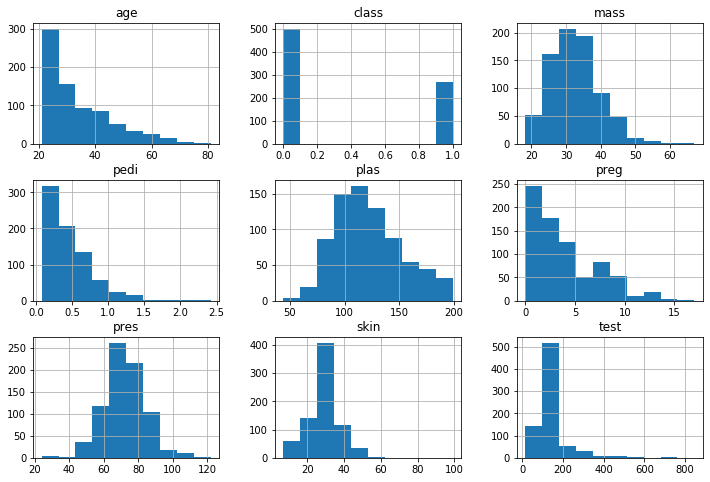

In [9]:
#Plotted the histogram for each numeric variable/attribute in the data set
df.hist(figsize=(12, 8))
pyplot.show()

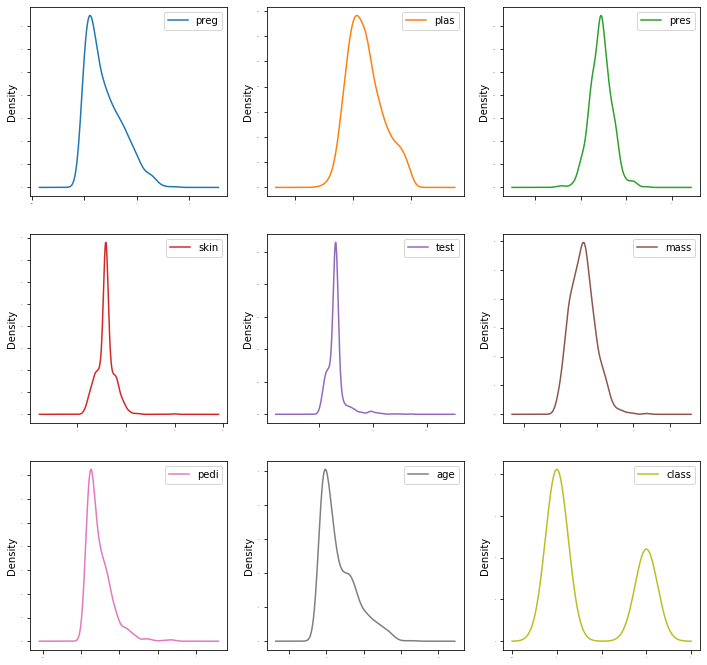

In [10]:
#Plotted density plots for each numeric variable/attribue in the dataset
df.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, legend=True, fontsize=1, figsize=(12, 16))
pyplot.show()

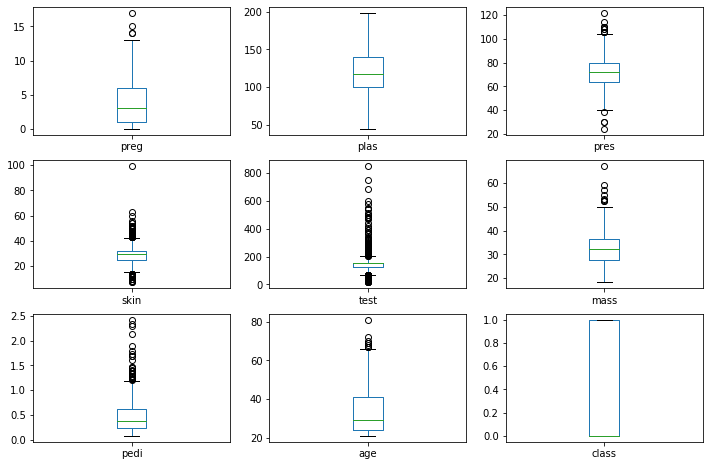

In [11]:
#Plotted box plots for each numeric variable/attribute in the dataset
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))
pyplot.show()

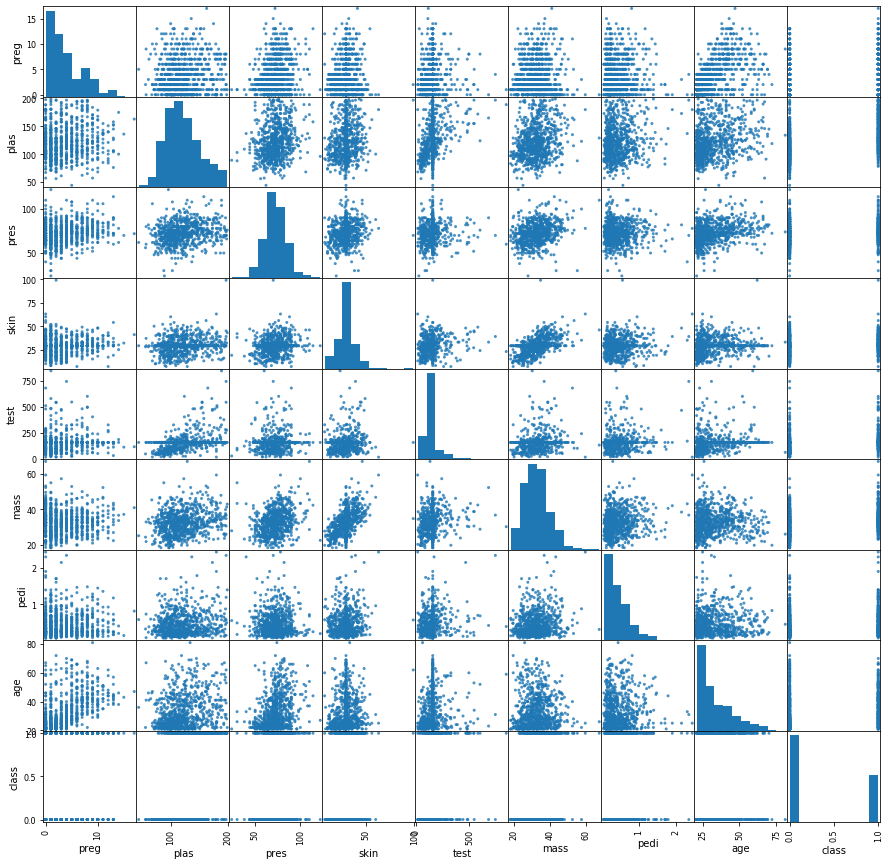

In [12]:
#Generated scatter plots for the numeric variables/attributes in the dataset 
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()

Below starts the different classification and predictive methods used. They include Random Forests, Decision Trees, Logistic Regression, and KNN.

The first method used will be Random Forests.
# Random Forest

In [13]:
X = df.drop('class',axis=1)
Y = df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

In [14]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
rf_report = classification_report(Y_test, Y_pred_rf)
print(rf_report)

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       157
         1.0       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Next, we analyze the data through Decision Trees.

In [15]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
dt_report = classification_report(Y_test, Y_pred_dt)
print(dt_report)

NameError: name 'DecisionTreeRegressor' is not defined

In [ ]:
df['target'] = 0.0
df['target'][df['class'] > 0] = 1.0
df['target'].value_counts()

In [ ]:
formula_lr = 'target ~ 0 + preg + plas + pres + skin + test + mass + pedi + age'
Y_lr, X_lr = dmatrices(formula_lr, df, return_type='dataframe')
y_lr = Y_lr['target'].values

In [ ]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.3, random_state=0)
model_lr = LogisticRegression(random_state=0)
result_lr = model_lr.fit(X_train_lr, y_train_lr)

In [ ]:
#Accuracy of the training data set = 76.350%
prediction_train_lr = model_lr.predict(X_train_lr)
print(metrics.accuracy_score(y_train_lr, prediction_train_lr))

In [ ]:
#Accuracy of the test data set = 78.355%
prediction_lr = model_lr.predict(X_test_lr)
print(metrics.accuracy_score(y_test_lr, prediction_lr))

In [ ]:
report_lr = classification_report(y_test_lr, prediction_lr)
print(report_lr)

In [ ]:
#y_train_lr is 0 or 1
print('Number of positive examples =', len(y_train_lr[y_train_lr==1]))
print('Number of negative examples =', len(y_train_lr[y_train_lr==0]))

In [ ]:
#Baseline has 146 correct responses with an accuracy = 63.203%

negative_examples_in_test_lr = len(y_test_lr[y_test_lr==0])
total_examples_in_test_lr = len(y_test_lr)

print('Number of examples where baseline is correct =', negative_examples_in_test_lr)
print('Baseline accuracy =', negative_examples_in_test_lr * 1.0 / total_examples_in_test_lr)

In [ ]:
#preg -- 0.0932335195
#plas -- 0.0264448868
#pres -- -0.0274993769
#skin -- -0.0128775051
#test -- -0.000161181578
#mass -- 0.0760001689
#pedi -- 0.353280112
#age -- 0.0135106773

#Based on the coefficients ouputted, pres, skin, and test are not siginificant in predicting if one has diabetes

model_lr.coef_

In [ ]:
#And the model intercept
model_lr.intercept_

In [16]:
weights_lr = Series(model_lr.coef_[0], index=X_lr.columns.values)
weights_lr.sort_values()

NameError: name 'model_lr' is not defined

Lastly, we analyze the data through KNN.

In [17]:
#Create a new 'target' column with all 0.0
df['target'] = 0.0

#Mask the rows with 1.0, and set them as the positive class
mask_knn = df['class'] == 1.0
df.loc[mask_knn, 'target'] = 1.0
df[:5]

,preg,plas,pres,skin,test,mass,pedi,age,class,target
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1.0,1.0


In [18]:
Y_knn, X_knn = dmatrices('target ~ 0 + preg + plas + pres + skin + test + mass + pedi + age', df, return_type="dataframe")
print('Design matrix X')
print(X_knn[:5])
print('Outcomes Y')
print(Y_knn[:5])

Design matrix X
   preg   plas  pres      skin        test  mass   pedi   age
0   6.0  148.0  72.0  35.00000  155.548223  33.6  0.627  50.0
1   1.0   85.0  66.0  29.00000  155.548223  26.6  0.351  31.0
2   8.0  183.0  64.0  29.15342  155.548223  23.3  0.672  32.0
3   1.0   89.0  66.0  23.00000   94.000000  28.1  0.167  21.0
4   0.0  137.0  40.0  35.00000  168.000000  43.1  2.288  33.0
Outcomes Y
   target
0     1.0
1     0.0
2     1.0
3     0.0
4     1.0


In [19]:
y_knn = Y_knn['target'].values

In [20]:
#Setting the x/y train and test matrices
#Test set size is 30% of the data set (training set = 70% of the data set)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3, random_state=0)

In [52]:
#Fitting the model with k=15, based on uniform, and using Euclidean distance
model_knn = neighbors.KNeighborsClassifier(n_neighbors=33, weights='uniform', p=2)

In [53]:
model_knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

In [54]:
#Accuracy of the training data set -- 76.536% accurate
prediction_on_training_knn = model_knn.predict(X_train_knn)
print(metrics.accuracy_score(y_train_knn, prediction_on_training_knn))


0.7486033519553073


In [55]:
#Accuracy of the KNN model (k=33) on the test data set -- 77.922% accurate
predicted_classes_knn = model_knn.predict(X_test_knn)
print(metrics.accuracy_score(y_test_knn, predicted_classes_knn))


0.7316017316017316


In [33]:
report_knn = classification_report(y_test_knn, predicted_classes_knn)
print(report_knn)

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83       157
         1.0       0.64      0.53      0.58        74

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.75       231



In [34]:
kfold_knn = model_selection.StratifiedKFold(n_splits=3).split(X=X_knn[:len(X_knn)], y=y_knn)

In [35]:
for train_knn, holdout_knn in kfold_knn:
    print("train and holdout indices set")

train and holdout indices set
train and holdout indices set
train and holdout indices set


In [36]:
def cv_accuracy_score(X_knn, y_knn, nn_knn):
    """For each fold, fit the nearest neighbors model
    with nn nearest neighbors on the train, and return accuracy
    on the test."""
    
    model_knn = neighbors.KNeighborsClassifier(n_neighbors=nn_knn, weights='uniform')
    accuracies_knn = []
    
    kfold_knn = model_selection.StratifiedKFold(n_splits=3, shuffle=True).split(X_knn, y_knn)
    for train_knn, holdout_knn in kfold_knn:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train_knn = X_knn.iloc[train_knn]
        X_holdout_knn = X_knn.iloc[holdout_knn]
        y_train_knn = y_knn[train_knn]
        y_holdout_knn = y_knn[holdout_knn]
        
        # Fit the model
        model_knn.fit(X_train_knn, y_train_knn)
        
        # Compute test accuracy
        accuracy_knn = metrics.accuracy_score(y_holdout_knn, model_knn.predict(X_holdout_knn))
        accuracies_knn.append(accuracy_knn)
    
    average_accuracy_knn = sum(accuracies_knn) * 1.0 / len(accuracies_knn)
    
    return average_accuracy_knn

In [37]:
#The average accuracy of the k-Fold Cross Validation model on the training set with varying KNN = 67.186%
return_knn = cv_accuracy_score(X_knn, y_knn, 1)

In [38]:
#Varying KNN
nn_knn = [1] + [(x_knn + 1) * 5 for x_knn in range(19)]
print(nn_knn)

[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


In [39]:
#Computes the scores for each KNN
scores_knn = [cv_accuracy_score(X_knn, y_knn, num_nbrs_knn) for num_nbrs_knn in nn_knn]

#Maximum accuracy on the test set = 75.259%
max_score_knn = max(scores_knn)
max_score_knn

0.7578608599730424

In [40]:
max_score_knn

0.7578608599730424

In [41]:
#Used to determine what the k= used to find the best test accuracy
for i in range(len(scores_knn)):
    if scores_knn[i] == max_score_knn:
        print("Index", i, "returns the highest test accuracy!")

Index 15 returns the highest test accuracy!


Text(0.5, 1.0, 'Accuracy per KNN')

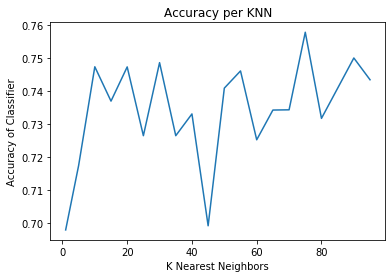

In [42]:
plot(nn_knn, scores_knn)
xlabel('K Nearest Neighbors')
ylabel('Accuracy of Classifier')
title("Accuracy per KNN")

Below is another method using k-Fold Cross Validation to determine the optimal KNN.

In [43]:
accuracy_knn2 = {}
knn = (range(1,76))

In [44]:
for x in knn:
    X_train_knn2, X_test_knn2, y_train_knn2, y_test_knn2 = train_test_split(X_knn, y_knn,
                                                                            test_size=0.3,
                                                                            random_state=1)
    
    model_knn2 = neighbors.KNeighborsClassifier(n_neighbors=x, weights='uniform', p=2)
    model_knn2.fit(X_train_knn2, y_train_knn2)
    prediction_on_training_knn2 = model_knn2.predict(X_train_knn2)
    
    print("Accuracy of the training set with k=" + str(x) + " is:",
          metrics.accuracy_score(y_train_knn2, prediction_on_training_knn2))
    
    predicted_classes_knn2 = model_knn2.predict(X_test_knn2)
    
    print("Accuracy of the model on the test set with k=" + str(x) + " is:",
          metrics.accuracy_score(y_test_knn2, predicted_classes_knn2))
    
    print()
    
    accuracy_knn2[x] = metrics.accuracy_score(y_test_knn2, predicted_classes_knn2)
    

Accuracy of the training set with k=1 is: 1.0
Accuracy of the model on the test set with k=1 is: 0.7359307359307359

Accuracy of the training set with k=2 is: 0.8286778398510242
Accuracy of the model on the test set with k=2 is: 0.7316017316017316

Accuracy of the training set with k=3 is: 0.8361266294227188
Accuracy of the model on the test set with k=3 is: 0.7402597402597403

Accuracy of the training set with k=4 is: 0.7951582867783985
Accuracy of the model on the test set with k=4 is: 0.7532467532467533

Accuracy of the training set with k=5 is: 0.7877094972067039
Accuracy of the model on the test set with k=5 is: 0.7575757575757576

Accuracy of the training set with k=6 is: 0.7728119180633147
Accuracy of the model on the test set with k=6 is: 0.7532467532467533

Accuracy of the training set with k=7 is: 0.7728119180633147
Accuracy of the model on the test set with k=7 is: 0.7575757575757576

Accuracy of the training set with k=8 is: 0.7653631284916201
Accuracy of the model on the t

Accuracy of the training set with k=64 is: 0.74487895716946
Accuracy of the model on the test set with k=64 is: 0.7489177489177489

Accuracy of the training set with k=65 is: 0.7486033519553073
Accuracy of the model on the test set with k=65 is: 0.7619047619047619

Accuracy of the training set with k=66 is: 0.7560521415270018
Accuracy of the model on the test set with k=66 is: 0.7532467532467533

Accuracy of the training set with k=67 is: 0.7616387337057728
Accuracy of the model on the test set with k=67 is: 0.7532467532467533

Accuracy of the training set with k=68 is: 0.7523277467411545
Accuracy of the model on the test set with k=68 is: 0.7575757575757576

Accuracy of the training set with k=69 is: 0.7653631284916201
Accuracy of the model on the test set with k=69 is: 0.7575757575757576

Accuracy of the training set with k=70 is: 0.7560521415270018
Accuracy of the model on the test set with k=70 is: 0.7575757575757576

Accuracy of the training set with k=71 is: 0.7541899441340782
Ac

In [45]:
accuracy_knn2

{1: 0.7359307359307359,
 2: 0.7316017316017316,
 3: 0.7402597402597403,
 4: 0.7532467532467533,
 5: 0.7575757575757576,
 6: 0.7532467532467533,
 7: 0.7575757575757576,
 8: 0.7489177489177489,
 9: 0.7575757575757576,
 10: 0.7575757575757576,
 11: 0.7445887445887446,
 12: 0.7489177489177489,
 13: 0.7619047619047619,
 14: 0.7619047619047619,
 15: 0.7792207792207793,
 16: 0.7705627705627706,
 17: 0.7835497835497836,
 18: 0.7619047619047619,
 19: 0.7575757575757576,
 20: 0.7575757575757576,
 21: 0.7619047619047619,
 22: 0.7619047619047619,
 23: 0.7575757575757576,
 24: 0.7662337662337663,
 25: 0.7662337662337663,
 26: 0.7748917748917749,
 27: 0.7705627705627706,
 28: 0.7835497835497836,
 29: 0.7792207792207793,
 30: 0.7792207792207793,
 31: 0.7792207792207793,
 32: 0.7835497835497836,
 33: 0.8008658008658008,
 34: 0.7835497835497836,
 35: 0.7878787878787878,
 36: 0.7835497835497836,
 37: 0.7835497835497836,
 38: 0.7748917748917749,
 39: 0.7748917748917749,
 40: 0.7662337662337663,
 41: 0.78

In [46]:
max_accuracy_knn = max(accuracy_knn2.values())

In [49]:
for key_knn, value_knn in accuracy_knn2.items():
    if value_knn == max_accuracy_knn:
        max_knn = key_knn
        print(max_knn)

33


In [50]:
print("k=" + str(max_knn) + " returns the highest accuracy on the test data set")
print("Accuracy:", max_accuracy_knn)

k=33 returns the highest accuracy on the test data set
Accuracy: 0.8008658008658008


In [58]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn,
                                                                    test_size=0.3,
                                                                    random_state=0)

model_knn = neighbors.KNeighborsClassifier(n_neighbors=max_knn, weights='uniform', p=2)

model_knn.fit(X_train_knn, y_train_knn)

prediction_on_training_knn = model_knn.predict(X_train_knn)

predicted_classes_knn = model_knn.predict(X_test_knn)

report_knn = classification_report(y_test_knn, predicted_classes_knn)
print(report_knn)

              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       157
         1.0       0.60      0.47      0.53        74

    accuracy                           0.73       231
   macro avg       0.69      0.66      0.67       231
weighted avg       0.72      0.73      0.72       231

